In [1]:
from captcha.image import ImageCaptcha
import matplotlib.pyplot as plt
import numpy as np
import random,os
import tensorflow as tf
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import keras
from keras import backend as K
from keras_tqdm import TQDMNotebookCallback


import string
characters = string.digits + string.ascii_uppercase
# print(characters)

width, height, n_len, n_class = 160, 80, 4, len(characters)


generator = ImageCaptcha(width=width, height=height)
# for i in range(1000):
#     random_str = ''.join([random.choice(characters) for j in range(4)])
#     img = generator.generate_image(random_str)
#     img.save('./pic/'+str(i) +'_'+ random_str + '.jpg')

Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import img_to_array,load_img
import numpy as np
from keras.layers import *
from keras.models import Model
import cv2 as cv

imgs = []
labels =[]
temp = [[] for i in range(4)]


def deal_img(img):
#     img = load_img(path,grayscale=True)
    kernel = np.ones((3,1), np.uint8)
    img = img_to_array(img).astype(np.uint8)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
#     img= cv.bilateralFilter(img,9,75,75)
#     img = cv.Canny(img, 100, 200)
    blur = cv.GaussianBlur(img, (5, 5), 0)
    _, img = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    img = cv.dilate(img, kernel, iterations=1)
    img = cv.erode(img, kernel, iterations=1)


    return img.reshape(height,width,1)


# def gen(batch_size=32):
#     X = np.zeros((batch_size, height, width, 3), dtype=np.uint8)
#     y = [np.zeros((batch_size, n_class), dtype=np.uint8) for i in range(n_len)]
#     generator = ImageCaptcha(width=width, height=height)
#     while True:
#         for i in range(batch_size):
#             random_str = ''.join([random.choice(characters) for j in range(4)])
#             X[i] = generator.generate_image(random_str)
#             for j, ch in enumerate(random_str):
#                 y[j][i, :] = 0
#                 y[j][i, characters.find(ch)] = 1
#         yield X, np.concatenate(y,axis=1)
def gen(batch_size=32):
    while True:
        imgs=[]
        labels = []
        for i in range(batch_size):
            random_str = ''.join([random.choice(characters) for j in range(4)])
            img = generator.generate_image(random_str)
            img = deal_img(img)
            imgs.append(img)
            y=np.zeros((len(characters)*4))
            for i,char in enumerate(random_str):
                y[characters.find(char)+i*len(characters)] = 1
            labels.append(y)   
        train_x = np.array(imgs)
        train_y = np.array(labels)
        yield train_x, train_y
        

# def gen(batch_size=32):
#     while True:
#         imgs=[]
#         labels = []
#         temp = [[] for i in range(4)]
#         for i in range(batch_size):
#             random_str = ''.join([random.choice(characters) for j in range(4)])
#             img = generator.generate_image(random_str)
#             img = deal_img(img)
#             imgs.append(img)
#             for i,char in enumerate(random_str):
#                 y=np.zeros((36))
#                 y[characters.find(char)] = 1
#                 temp[i].append(y)
            
#         train_x = np.array(imgs)
#         train_y = [np.array(i) for i in temp]
#         yield train_x, train_y
    

# def deal_img(path):
#     img = load_img(path,grayscale=True)
#     img = img_to_array(img).astype(np.uint8)
#     img= cv.bilateralFilter(img,9,75,75)
#     img = cv.Canny(img, 100, 200)
#     return img.reshape(height,width,1)/255

# for f in os.listdir('./pic/')[:500]:
# #     print(type(f))
#     if f.endswith('jpg'):
#         img = deal_img('./pic/'+f)
#         imgs.append(img)
#         string = f.split('.')[0].split('_')[1]
#         y=np.zeros((len(characters)*4))
#         for i,char in enumerate(string):   
# #             y=np.zeros((36))
# #             y[characters.find(char)] = 1
# #             temp[i].append(y)
#             y[characters.find(char)+i*len(characters)] = 1
#         labels.append(y)
# # train_y = [np.array(i) for i in temp]
# train_y = np.array(labels)
# print(train_y.shape)
# # print(imgs[0].shape)
# train_x = np.array(imgs)
# # print(len(labels))
# # train_y = labels
# # train_y = np.array(labels)
        
# input_tensor = Input((height, width, 1))
# x = input_tensor
# x = Conv2D(64, (3, 3), activation='relu', padding='SAME')(x)
# x = Conv2D(64, (3, 3), activation='relu', padding='SAME')(x)
# x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# x = Conv2D(128, (3, 3), activation='relu', padding='SAME')(x)
# x = Conv2D(128, (3, 3), activation='relu', padding='SAME')(x)
# x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# # x = Conv2D(256, (3, 3), activation='relu', padding='SAME')(x)
# # x = Conv2D(256, (3, 3), activation='relu', padding='SAME')(x)
# # x = Conv2D(256, (3, 3), activation='relu', padding='SAME')(x)
# # x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# # x = Conv2D(512, (3, 3), activation='relu', padding='SAME')(x)
# # x = Conv2D(512, (3, 3), activation='relu', padding='SAME')(x)
# # x = Conv2D(512, (3, 3), activation='relu', padding='SAME')(x)
# # x = MaxPooling2D((2, 2),strides=(2,2), padding='SAME', name='block4_pool')(x)

# # x = Conv2D(512, (3, 3), activation='relu', padding='SAME')(x)
# # x = Conv2D(512, (3, 3), activation='relu', padding='SAME')(x)
# # x = Conv2D(512, (3, 3), activation='relu', padding='SAME')(x)
# # x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

# x = Flatten()(x)
# x = Dense(1024,activation='relu')(x)
# # x = Dense(1024,activation='relu')(x)

# # x = Dropout(0.3)(x)
# x = [Dense(n_class, activation='softmax', name='c%d'%(i+1))(x) for i in range(4)]
# x = concatenate(x)

# model = Model(inputs=input_tensor, outputs=x)



# input_tensor = Input( shape=(height, width, 1))
# x = input_tensor

# #构建卷积网络
# #两层卷积层，一层池化层，重复3次。因为生成的验证码比较小，padding使用same
# x = Convolution2D(32, 5, padding='same', activation='relu')(input_tensor)
# x = Convolution2D(32, 5, padding='same', activation='relu')(x)
# x = MaxPooling2D((2, 2))(x)


# x = Convolution2D(64, 5, padding='same', activation='relu')(x)
# x = Convolution2D(64, 5, padding='same', activation='relu')(x)
# x = MaxPooling2D((2, 2))(x)

# x = Convolution2D(128, 5, padding='same', activation='relu')(x)
# x = Convolution2D(128, 5, padding='same',activation='relu')(x)
# x = MaxPooling2D((2, 2))(x)

# #Flatten层用来将输入“压平”，即把多维的输入一维化，常用在从卷积层到全连接层的过渡。
# x = Flatten()(x)
# #为输入数据施加Dropout。Dropout将在训练过程中每次更新参数时随机断开一定百分比（rate）的输入神经元，Dropout层用于防止过拟合。
# # x = Dense(128,activation='relu')(x)
# # x = Dense(128,activation='relu')(x)
# x = Dropout(0.25)(x)
# model = Model(inputs=input_tensor, outputs=output)



# input_tensor = Input(shape=(height, width, 1))
# x = input_tensor

# #构建卷积网络
# #两层卷积层，一层池化层，重复3次。因为生成的验证码比较小，padding使用same
# x = Convolution2D(32, 5, padding='same')(input_tensor)
# x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.1)(x)

# x = Convolution2D(64, 5, padding='same')(x)
# x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.1)(x)


# x = Convolution2D(64, 5, padding='same')(x)
# x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.1)(x)



# #Flatten层用来将输入“压平”，即把多维的输入一维化，常用在从卷积层到全连接层的过渡。
# x = Flatten()(x)
# #为输入数据施加Dropout。Dropout将在训练过程中每次更新参数时随机断开一定百分比（rate）的输入神经元，Dropout层用于防止过拟合。
# x = Dense(1024,activation='relu')(x)
# x = Dense(144,activation='relu')(x)
# # x = Dense(128,activation='relu')(x)
# # x = Dropout(0.25)(x)


# #Dense就是常用的全连接层
# #最后连接5个分类器，每个分类器是46个神经元，分别输出46个字符的概率。
# # x = [Dense(len(characters), activation='softmax', name='c%d'%(i+1))(x) for i in range(n_len)]
# # output = concatenate(x)
# model = Model(inputs=input_tensor, outputs=x)
    
# input_tensor = Input(shape=(height, width, 1))
# x = input_tensor

# for i in range(4):
#     layer_num = 32*2**i
#     x = Conv2D(layer_num, (3, 3), activation='relu')(x)
#     x = Conv2D(layer_num, (3, 3), activation='relu')(x)
#     x = MaxPooling2D((2, 2))(x)
    
# x = Flatten()(x)
# x = Dropout(0.25)(x)
# x = [Dense(n_class, activation='softmax', name='c%d'%(i+1))(x) for i in range(4)]
# x= concatenate(x)
# model = Model(inputs=input_tensor, outputs=x)


input_tensor = Input(shape=(height, width, 1))
x = input_tensor
for i in range(4):
    x = Conv2D(32*2**i, (3, 3), activation='relu')(x)
    x = Conv2D(32*2**i, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = [Dense(n_class, activation='softmax', name='c%d'%(i+1))(x) for i in range(4)]
x = concatenate(x)
model = Model(inputs=input_tensor, outputs=x)


(1, 144)


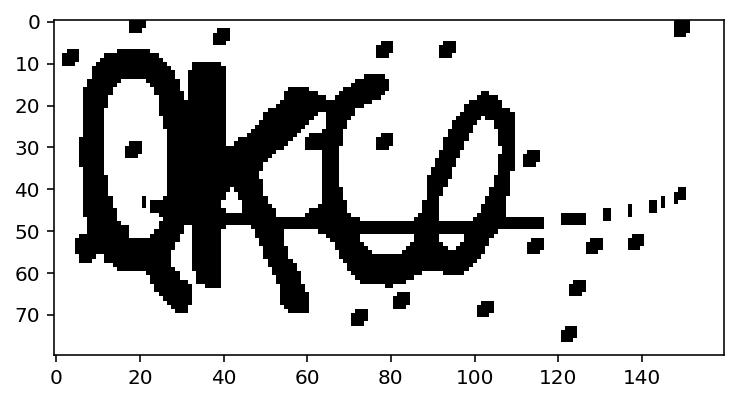

In [3]:
img,y = next(gen(1))
# np.set_printoptions(threshold=np.inf)
img1 = np.copy(img)

plt.imshow(img[0].reshape((80,160)),cmap='gray')
print(y.shape)
# plt.figure()
# plt.imshow(img1.reshape((80,160)),cmap='gray')
# print(y[:,0:36].shape)
# print(y.shape)
# img[0][20]

In [5]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 80, 160, 1)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 78, 158, 32)  320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 76, 156, 32)  9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 38, 78, 32)   0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

In [32]:
tf_session = K.get_session()

def my_acc(y_true, y_pred):
    predict = tf.reshape(y_pred, [-1, n_len, len(characters)])
    max_idx_p = tf.argmax(predict, -1)
    max_idx_l = tf.argmax(tf.reshape(y_true, [-1,n_len, len(characters)]), -1)
    print(K.int_shape(max_idx_p))
    print(K.int_shape(max_idx_l))
    correct_pred = tf.reduce_all(tf.equal(max_idx_p, max_idx_l),axis=1)
    return tf.reduce_mean(tf.cast(correct_pred, tf.float32))

def my_loss(y_true, y_pred):
#     print(keras.backend.int_shape(y_pred))

#     predict = tf.reshape(y_pred, [-1, n_len, len(characters)])
#     y_true = tf.reshape(y_true, [-1, n_len, len(characters)])
#     a,b = [[] for i in range(n_len)],[[] for i in range(n_len)]
#     loss = tf.Variable(initial_value=0.0)
    loss = tf.zeros((1,))
    for i in range(n_len):
#         a = tf.reshape(predict[:,i,:],(-1,len(characters)))
#         a = predict[:,i,:]
#         b = y_true[:,i,:]
        a = tf.reshape(y_pred[:,i*36:(i+1)*36],shape=(-1,36))
#         print(keras.backend.int_shape(a))

        b = tf.reshape(y_true[:,i*36:(i+1)*36],shape=(-1,36))
#         b = tf.reshape(y_true[:,i,:],(-1,len(characters)))
#         print(keras.backend.int_shape(b))
        loss = tf.add(loss,tf.keras.losses.categorical_crossentropy(b,a))
    return loss
    
#     max_idx_p,max_idx_l = [[] for i in range(n_len)],[[] for i in range(n_len)]
#     for i in range(n_len):
#         max_idx_p[i] = K.one_hot(tf.argmax(predict, 2)[:,i],len(characters))
#         max_idx_l[i] = K.one_hot(tf.argmax(tf.reshape(y_true, [-1,n_len, len(characters)]), 2)[:,i],len(characters))
#         loss+= K.categorical_crossentropy(max_idx_p[i],max_idx_l[i])
#     return loss

#     max_idx_p = K.one_hot(tf.argmax(predict, 2),len(characters))
#     max_idx_l = K.one_hot(tf.argmax(tf.reshape(y_true, [-1,n_len, len(characters)]), 2),len(characters))
#     return loss

# optimizer = tf.train.AdadeltaOptimizer(learning_rate=0.5)
model.compile(loss = my_loss,
#                loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics=[my_acc,'acc'])
checkpointer = keras.callbacks.ModelCheckpoint(filepath='output/weight.h5',#"output/weights.{epoch:02d}--{val_loss:.2f}-{val_my_acc:.4f}.hdf5", 
                               verbose=2, save_weights_only=True)
# for i in range(10):
model.fit_generator(gen(32),steps_per_epoch=15000,epochs=1,verbose=1,validation_data=gen(100),validation_steps=1,callbacks=[checkpointer])

(None, 4)
(None, 4)
Epoch 1/1
15000/15000 [==============================] - 13561s 904ms/step - loss: 0.4114 - my_acc: 0.9086 - acc: 0.3406 - val_loss: 0.6470 - val_my_acc: 0.8500 - val_acc: 0.3700

Epoch 00001: saving model to output/weight.h5


In [8]:
def decode_str(result):
    strings =[]
    for s in range(result.shape[0]):
        string = [characters[result[s,i*len(characters):(i+1)*len(characters)].argmax()] for i in range(n_len)]
        strings.append(string)
    return [''.join(string) for string in strings]

In [28]:
x,y = next(gen(1000))
true_label = decode_str(y)

In [29]:
score = model.evaluate(x,y,verbose=2)
result = model.predict(x,verbose=2)

In [31]:
score

[0.3298118329048157, 0.933, 0.298]

In [30]:
decode_str(result)

['6J5S',
 'VUMB',
 'LHV1',
 'UR4Y',
 'SZC7',
 'M170',
 'KA08',
 'UPPN',
 'UH4N',
 'MXKF',
 '7S6N',
 'X5LU',
 'BQ94',
 'UVGR',
 'SNP3',
 '90N2',
 'U8I5',
 'EY8T',
 '6DQY',
 '81WA',
 'CZ65',
 '4FR6',
 'T5OI',
 'DBV0',
 'K4IY',
 '27PI',
 'YLA9',
 'NKRD',
 'X4WX',
 'VCID',
 'G7AE',
 'FLNQ',
 'FE7V',
 'UXZV',
 'A5OS',
 'S8NT',
 'OL26',
 'OJQI',
 'H5KD',
 'K4QV',
 'WZ1L',
 'MYUA',
 'QWMG',
 'ELVI',
 '3VEI',
 '8IOA',
 '0000',
 'STYJ',
 '64K9',
 'AFD5',
 'SFZD',
 'TQET',
 'VO7V',
 '5MAF',
 'X13D',
 'ORAZ',
 '66PW',
 '5TUK',
 'GZHJ',
 'RR50',
 '0HY7',
 'LPEM',
 'DROM',
 'MZ25',
 '6S5M',
 'JX2Q',
 'ABQX',
 'H6D3',
 'O6J8',
 'C573',
 'SHD4',
 'TXND',
 'ZC9Y',
 '19VE',
 '47EL',
 'FO1G',
 'XZRD',
 'ZXI3',
 'X507',
 'G0XB',
 'MYV4',
 'H6F3',
 '8QEA',
 'JPUZ',
 'BA5C',
 '0KIP',
 'YW2P',
 'VUEX',
 'X813',
 'D3L2',
 'UUFH',
 'AT18',
 'L0A0',
 'NQWY',
 'SAPO',
 '35TH',
 'R4I8',
 'ZHGP',
 'MI8Q',
 'IBI2',
 'DXJO',
 'E430',
 '69RA',
 'F4MD',
 'BRDU',
 'CGZH',
 '6PD6',
 'NQBH',
 'ALRF',
 'XL7X',
 'B68R',
 

In [26]:
score

[0.29335214774310586, 0.936, 0.312]

In [22]:
def test_acc(true_label, result):
    count = 0
    for i,j in zip(true_label,decode_str(result)):
        if i==j:
            count+=1
    return count/len(true_label)
test_acc(true_label,result)

0.921